In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [78]:
 df = pd.read_csv("German_GDP.csv", encoding="ISO-8859-1", header=1)

In [79]:
df.shape

(173, 15)

In [80]:
df = df.rename(columns={'Country (current borders)': 'Country'})

In [81]:
df = df[['Country', 'Region', '1900', '1910', '1925', '1938','1950', '1960', '1970', '1980', '1990', '2000', '2010', '2015']]

### Data cleaning begin

In [82]:
df_DE = df[df['Country'].isin(['Germany'])]

In [83]:
df_DE 

,Country,Region,1900,1910,1925,1938,1950,1960,1970,1980,1990,2000,2010,2015
49,Germany,"Stuttgart, Regierungsbezirk",4841.607984,7285.838489,6508.11894,11961.80362,16949.11476,45888.22131,72110.740880,94302.890680,122784.9527,166144.47740,200197.02260,244565.67900
50,Germany,"Karlsruhe, Regierungsbezirk",4360.150736,7120.50611,6060.59803,10251.53688,13182.24479,30790.4013,51983.456230,62198.767120,80983.36151,103931.05720,125462.14120,142900.08940
51,Germany,"Freiburg, Regierungsbezirk",3385.175906,4977.100939,3604.496973,7201.24998,8418.358762,17397.25208,29454.906150,41629.785110,51838.12704,71936.78825,87303.07749,99590.02784
52,Germany,"Tbingen, Regierungsbezirk",2587.77487,3741.538975,3018.722616,5570.458454,7241.451745,13844.81865,24079.132790,33672.105940,45056.79638,62395.98464,78753.34611,90883.25481
53,Germany,"Oberbayern, Regierungsbezirk",4748.441117,6447.440109,6158.772743,11216.45088,15163.10257,37152.30147,70198.815700,104458.027900,145001.0097,196903.50570,245701.86280,303408.95380
54,Germany,"Niederbayern, Regierungsbezirk",1737.41323,2181.964511,1504.311345,2939.396595,5599.526406,7511.836613,12513.359280,18176.455680,25803.81836,36395.07557,48510.17587,54938.74702
55,Germany,"Oberpfalz, Regierungsbezirk",1330.106999,1910.053449,1511.030364,2594.787184,4856.660228,7953.719727,12978.708330,16638.390690,23378.81435,35532.22157,46008.87625,52583.47152
56,Germany,"Oberfranken, Regierungsbezirk",1857.738985,2686.609584,2387.220413,4809.532099,7193.106298,11788.3694,17738.751980,20958.080970,28219.50762,33783.06493,41311.73293,45243.67622
57,Germany,"Mittelfranken, Regierungsbezirk",2900.217768,4545.820773,3965.654949,6772.267512,7896.963792,17143.3368,28114.481070,35726.721420,47137.94766,61704.80816,75734.52460,87591.31119
58,Germany,"Unterfranken, Regierungsbezirk",1795.093097,2968.760372,2447.006844,4504.909012,5953.73,10852.14498,17278.227970,22156.505800,30442.95645,44544.03510,54679.98084,60573.04935


In [84]:
df_DE.isnull().sum()

Country    0
Region     0
1900       0
1910       0
1925       0
1938       0
1950       0
1960       0
1970       0
1980       0
1990       0
2000       0
2010       0
2015       0
dtype: int64

In [85]:
df_DE.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 49 to 84
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  36 non-null     object 
 1   Region   36 non-null     object 
 2   1900     36 non-null     object 
 3   1910     36 non-null     object 
 4   1925     36 non-null     object 
 5   1938     36 non-null     object 
 6   1950     36 non-null     object 
 7   1960     36 non-null     object 
 8   1970     36 non-null     float64
 9   1980     36 non-null     float64
 10  1990     36 non-null     object 
 11  2000     36 non-null     float64
 12  2010     36 non-null     float64
 13  2015     36 non-null     float64
dtypes: float64(5), object(9)
memory usage: 4.2+ KB


In [86]:
df_DE['1925']= df_DE['1925'].apply(pd.to_numeric, errors='coerce')
df_DE['1938']= df_DE['1938'].apply(pd.to_numeric, errors='coerce')
df_DE['1950']= df_DE['1950'].apply(pd.to_numeric, errors='coerce')
df_DE['1960']= df_DE['1960'].apply(pd.to_numeric, errors='coerce')
df_DE['1990']= df_DE['1990'].apply(pd.to_numeric, errors='coerce')


C:\Users\user\AppData\Local\Temp\ipykernel_17992\3559995782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DE['1925']= df_DE['1925'].apply(pd.to_numeric, errors='coerce')
C:\Users\user\AppData\Local\Temp\ipykernel_17992\3559995782.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DE['1938']= df_DE['1938'].apply(pd.to_numeric, errors='coerce')
C:\Users\user\AppData\Local\Temp\ipykernel_17992\3559995782.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [87]:
df_DE['1900']= df_DE['1900'].apply(pd.to_numeric, errors='coerce')

C:\Users\user\AppData\Local\Temp\ipykernel_17992\3486164250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DE['1900']= df_DE['1900'].apply(pd.to_numeric, errors='coerce')


In [88]:
df_DE['1910']= df_DE['1910'].apply(pd.to_numeric, errors='coerce')

C:\Users\user\AppData\Local\Temp\ipykernel_17992\419474636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DE['1910']= df_DE['1910'].apply(pd.to_numeric, errors='coerce')


In [89]:
df_DE.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 49 to 84
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  36 non-null     object 
 1   Region   36 non-null     object 
 2   1900     36 non-null     float64
 3   1910     36 non-null     float64
 4   1925     36 non-null     float64
 5   1938     36 non-null     float64
 6   1950     36 non-null     float64
 7   1960     36 non-null     float64
 8   1970     36 non-null     float64
 9   1980     36 non-null     float64
 10  1990     35 non-null     float64
 11  2000     36 non-null     float64
 12  2010     36 non-null     float64
 13  2015     36 non-null     float64
dtypes: float64(12), object(2)
memory usage: 4.2+ KB


In [90]:
# Create a new DataFrame by copying the original DataFrame
DE_Total_GDP = df_DE.copy()

# Calculate the 'Total_GDP' and add it as a new column
DE_Total_GDP['Total_GDP'] = df_DE[['1900', '1910', '1925', '1938', '1950', '1960',
                                   '1970', '1980', '1990', '2000', '2010', '2015']].sum(axis=1)



In [91]:
DE_Total_GDP.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 49 to 84
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    36 non-null     object 
 1   Region     36 non-null     object 
 2   1900       36 non-null     float64
 3   1910       36 non-null     float64
 4   1925       36 non-null     float64
 5   1938       36 non-null     float64
 6   1950       36 non-null     float64
 7   1960       36 non-null     float64
 8   1970       36 non-null     float64
 9   1980       36 non-null     float64
 10  1990       35 non-null     float64
 11  2000       36 non-null     float64
 12  2010       36 non-null     float64
 13  2015       36 non-null     float64
 14  Total_GDP  36 non-null     float64
dtypes: float64(13), object(2)
memory usage: 4.5+ KB


In [92]:
df_DE.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 49 to 84
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  36 non-null     object 
 1   Region   36 non-null     object 
 2   1900     36 non-null     float64
 3   1910     36 non-null     float64
 4   1925     36 non-null     float64
 5   1938     36 non-null     float64
 6   1950     36 non-null     float64
 7   1960     36 non-null     float64
 8   1970     36 non-null     float64
 9   1980     36 non-null     float64
 10  1990     35 non-null     float64
 11  2000     36 non-null     float64
 12  2010     36 non-null     float64
 13  2015     36 non-null     float64
dtypes: float64(12), object(2)
memory usage: 4.2+ KB


In [93]:
DE_Total_GDP

,Country,Region,1900,1910,1925,1938,1950,1960,1970,1980,1990,2000,2010,2015,Total_GDP
49,Germany,"Stuttgart, Regierungsbezirk",4841.607984,7285.838489,6508.118940,11961.803620,16949.114760,45888.221310,72110.740880,94302.890680,122784.95270,166144.47740,200197.02260,244565.67900,9.935405e+05
50,Germany,"Karlsruhe, Regierungsbezirk",4360.150736,7120.506110,6060.598030,10251.536880,13182.244790,30790.401300,51983.456230,62198.767120,80983.36151,103931.05720,125462.14120,142900.08940,6.392243e+05
51,Germany,"Freiburg, Regierungsbezirk",3385.175906,4977.100939,3604.496973,7201.249980,8418.358762,17397.252080,29454.906150,41629.785110,51838.12704,71936.78825,87303.07749,99590.02784,4.267363e+05
52,Germany,"Tbingen, Regierungsbezirk",2587.774870,3741.538975,3018.722616,5570.458454,7241.451745,13844.818650,24079.132790,33672.105940,45056.79638,62395.98464,78753.34611,90883.25481,3.708454e+05
53,Germany,"Oberbayern, Regierungsbezirk",4748.441117,6447.440109,6158.772743,11216.450880,15163.102570,37152.301470,70198.815700,104458.027900,145001.00970,196903.50570,245701.86280,303408.95380,1.146559e+06
54,Germany,"Niederbayern, Regierungsbezirk",1737.413230,2181.964511,1504.311345,2939.396595,5599.526406,7511.836613,12513.359280,18176.455680,25803.81836,36395.07557,48510.17587,54938.74702,2.178121e+05
55,Germany,"Oberpfalz, Regierungsbezirk",1330.106999,1910.053449,1511.030364,2594.787184,4856.660228,7953.719727,12978.708330,16638.390690,23378.81435,35532.22157,46008.87625,52583.47152,2.072768e+05
56,Germany,"Oberfranken, Regierungsbezirk",1857.738985,2686.609584,2387.220413,4809.532099,7193.106298,11788.369400,17738.751980,20958.080970,28219.50762,33783.06493,41311.73293,45243.67622,2.179774e+05
57,Germany,"Mittelfranken, Regierungsbezirk",2900.217768,4545.820773,3965.654949,6772.267512,7896.963792,17143.336800,28114.481070,35726.721420,47137.94766,61704.80816,75734.52460,87591.31119,3.792341e+05
58,Germany,"Unterfranken, Regierungsbezirk",1795.093097,2968.760372,2447.006844,4504.909012,5953.730000,10852.144980,17278.227970,22156.505800,30442.95645,44544.03510,54679.98084,60573.04935,2.581964e+05


In [94]:
DE_Total_GDP['Total_GDP'] = DE_Total_GDP['Total_GDP'].astype(int)

In [95]:
df_long = pd.melt(df_DE, id_vars=['Country', 'Region'], var_name='Year', value_name='GDP')
# making the dataset in long format to do line plot

In [96]:
df_long

,Country,Region,Year,GDP
0,Germany,"Stuttgart, Regierungsbezirk",1900,4841.607984
1,Germany,"Karlsruhe, Regierungsbezirk",1900,4360.150736
2,Germany,"Freiburg, Regierungsbezirk",1900,3385.175906
3,Germany,"Tbingen, Regierungsbezirk",1900,2587.774870
4,Germany,"Oberbayern, Regierungsbezirk",1900,4748.441117
...,...,...,...,...
427,Germany,"Chemnitz, NUTS 2-Region",2015,47433.999710
428,Germany,"Leipzig, NUTS 2-Region",2015,38025.801990
429,Germany,Sachsen-Anhalt,2015,70524.879050
430,Germany,Schleswig-Holstein,2015,107398.870600


## Data exploratory Graph

<Figure size 5000x5000 with 0 Axes>

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


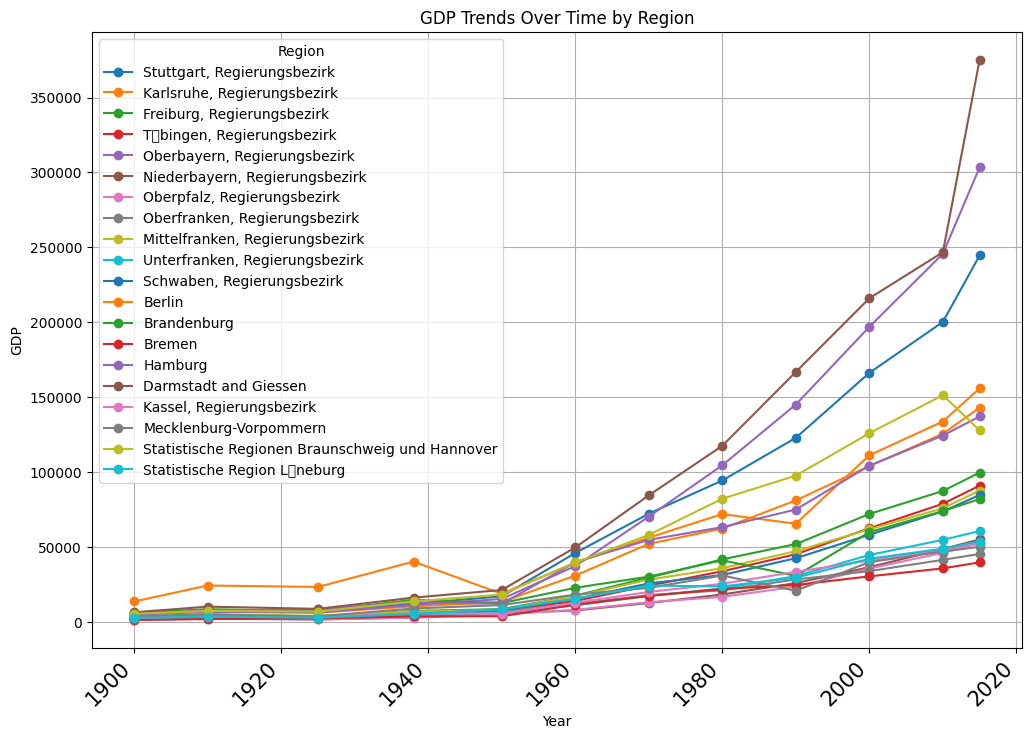

In [97]:
plt.figure(figsize=(50, 50))
df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce').astype(int)
df_long['GDP'] = pd.to_numeric(df_long['GDP'], errors='coerce')

# Create a line plot
plt.figure(figsize=(12, 8))

# Plot each region
for region in df_long['Region'].unique()[:20]:
    region_data = df_long[df_long['Region'] == region]
    plt.plot(region_data['Year'], region_data['GDP'], marker='o', label=region)

# Add titles and labels
plt.title('GDP Trends Over Time by Region')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend(title='Region')
plt.xticks(rotation=45, ha='right', fontsize=15) 
plt.grid(True)


plt.show()

## GDP of Germany changes from 1900 to 1950 by year.

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


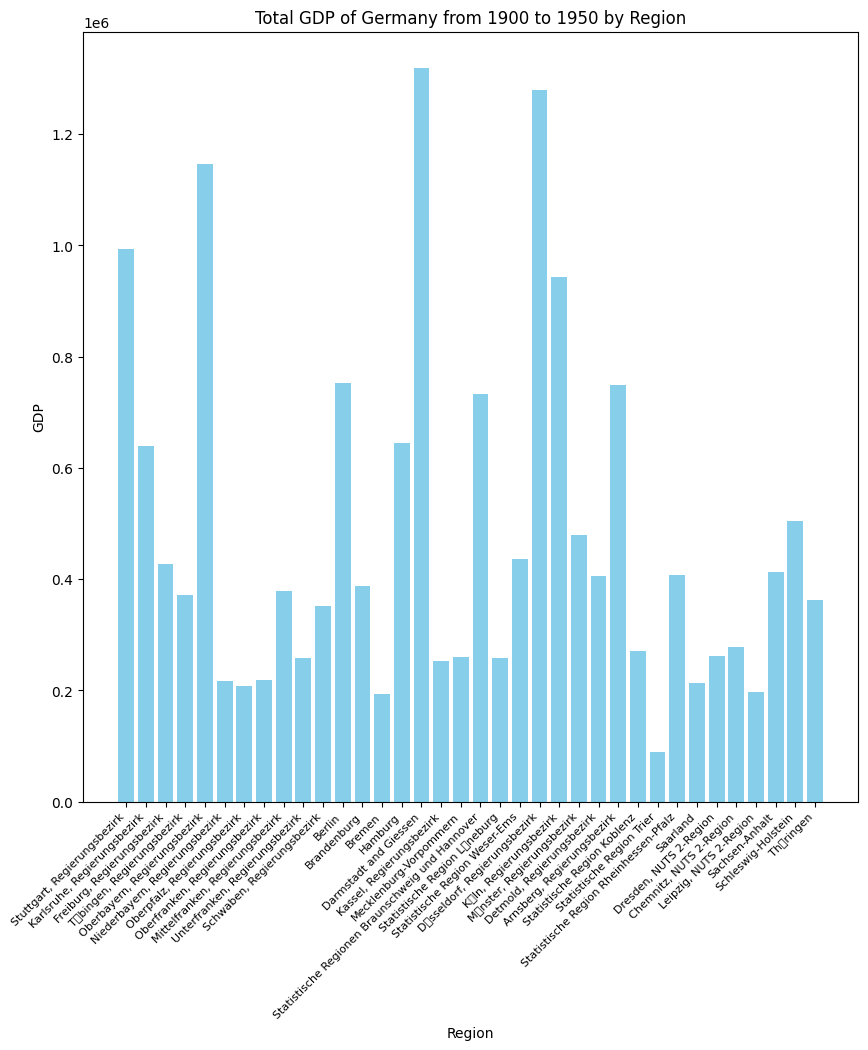

In [98]:
regions = DE_Total_GDP['Region']
gdp_1900 = DE_Total_GDP['Total_GDP']

# Set up the bar plot
plt.figure(figsize=(10, 10))
plt.bar(regions, gdp_1900, color='skyblue')

# Add titles and labels
plt.title('Total GDP of Germany from 1900 to 1950 by Region')
plt.xlabel('Region')
plt.ylabel('GDP')
plt.xticks(rotation=45, ha='right', fontsize=8) 

# Show the plot
plt.show()
 

# Total GDP of Germany changes from 1900 to 1950.

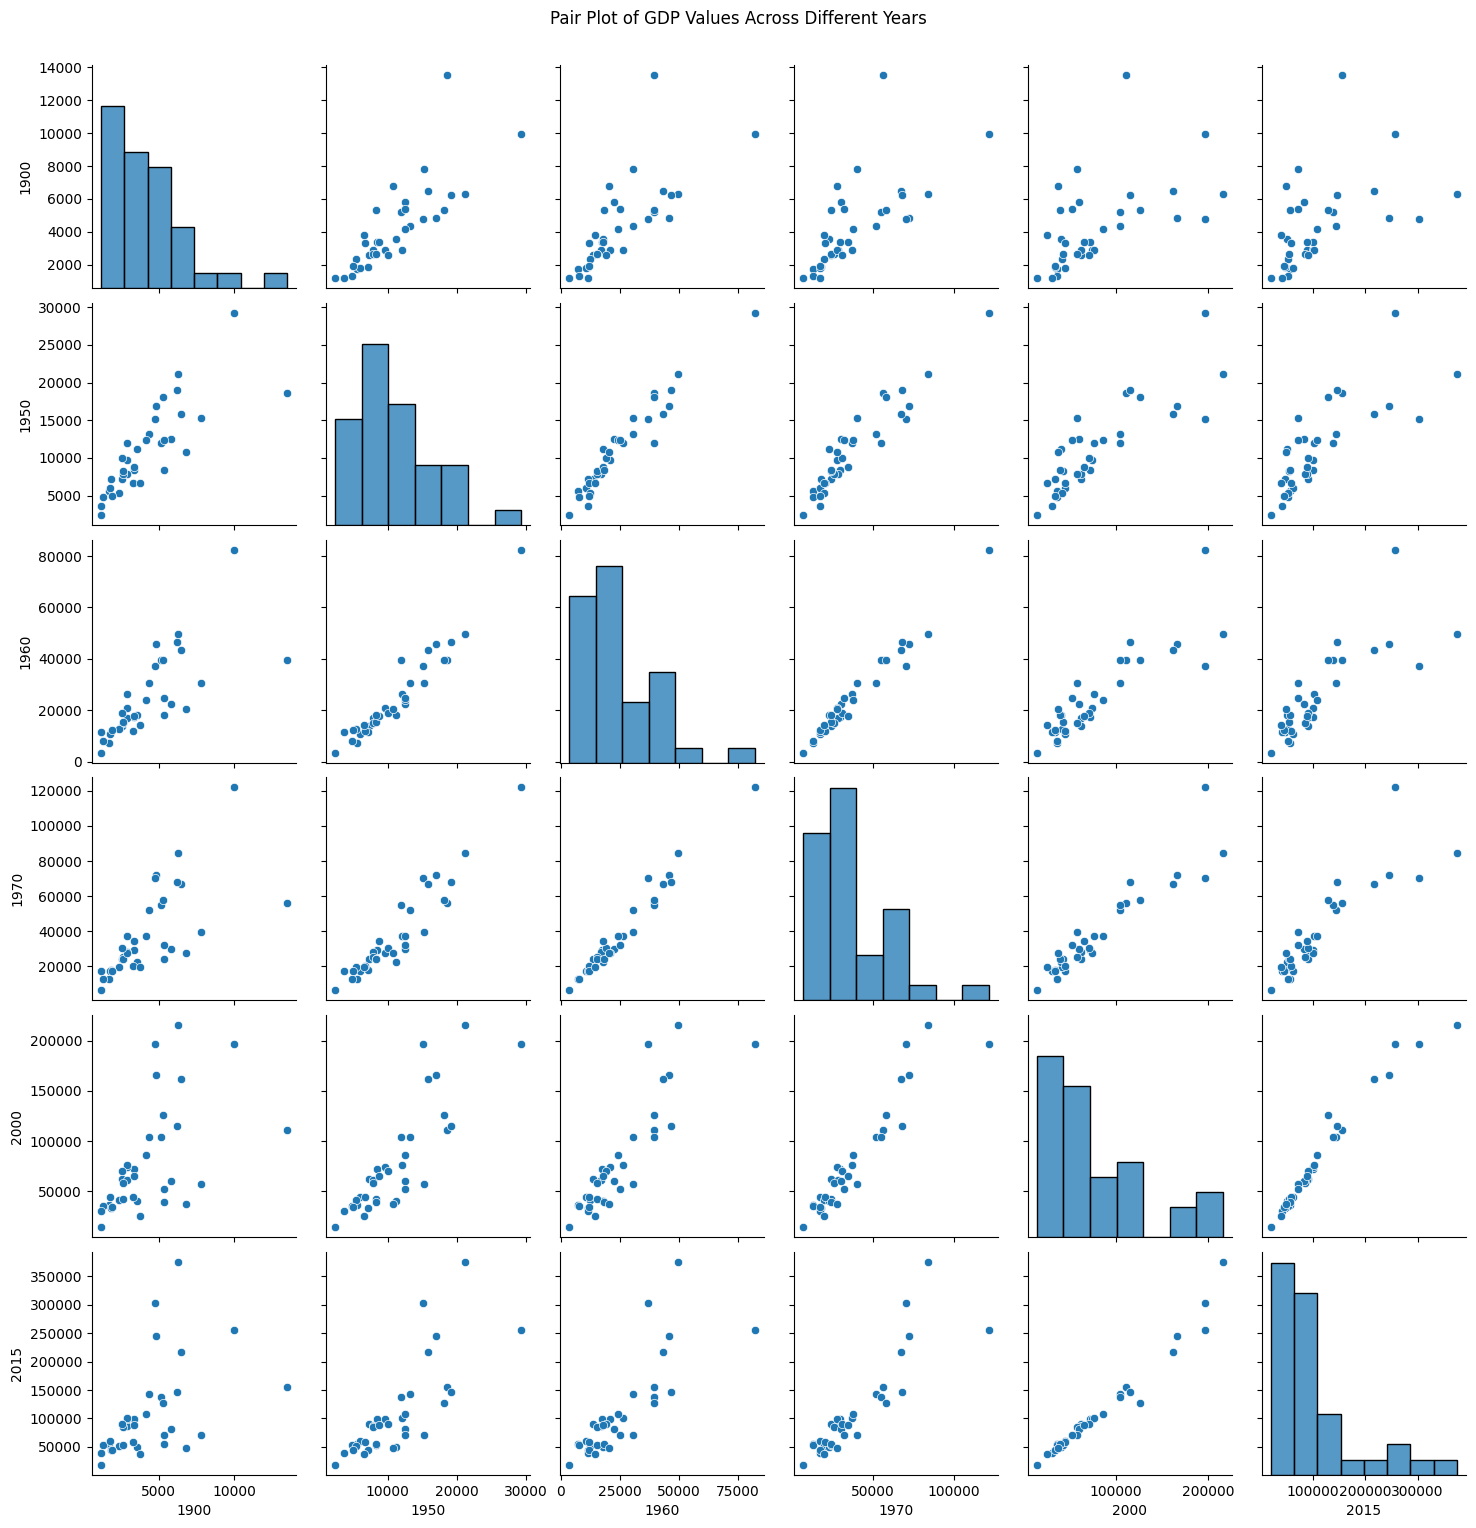

In [99]:
year_columns = ['1900', '1950', '1960', '1970', '2000', '2015']

# Generate pair plot
sns.pairplot(df_DE[year_columns])

# Add title
plt.suptitle('Pair Plot of GDP Values Across Different Years', y=1.02)

# Show the plot
plt.show()

## a pair plot for GDP values across the years


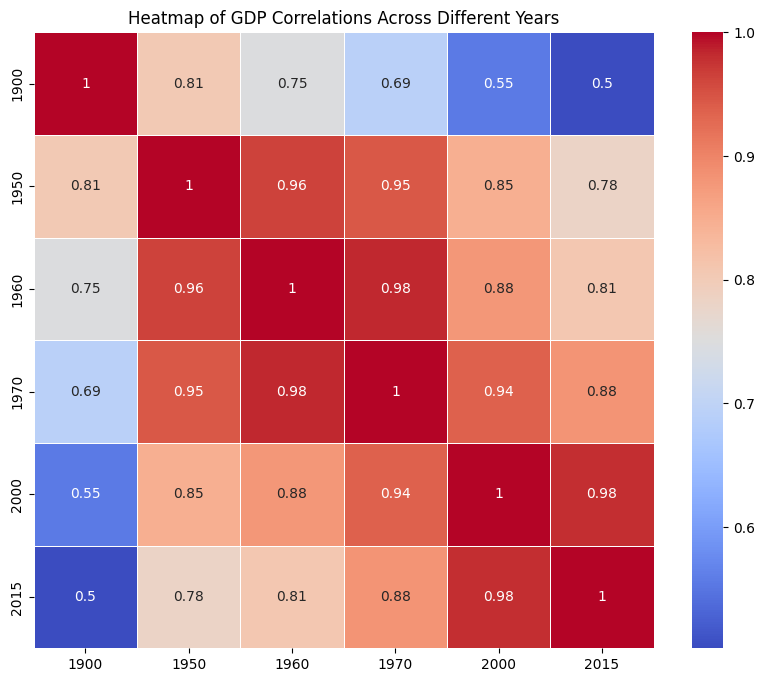

In [100]:
corr_matrix = df_DE[year_columns].corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Add title
plt.title('Heatmap of GDP Correlations Across Different Years')

# Show the plot
plt.show()

### Heatmap of GDP Correlations Across Different Years.

['1900' '1910' '1925' '1938' '1950' '1960' '1970' '1980' '1990' '2000'
 '2010' '2015']


C:\Users\user\AppData\Local\Temp\ipykernel_17992\1345759623.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='GDP', data=df_melted, palette='Set3')


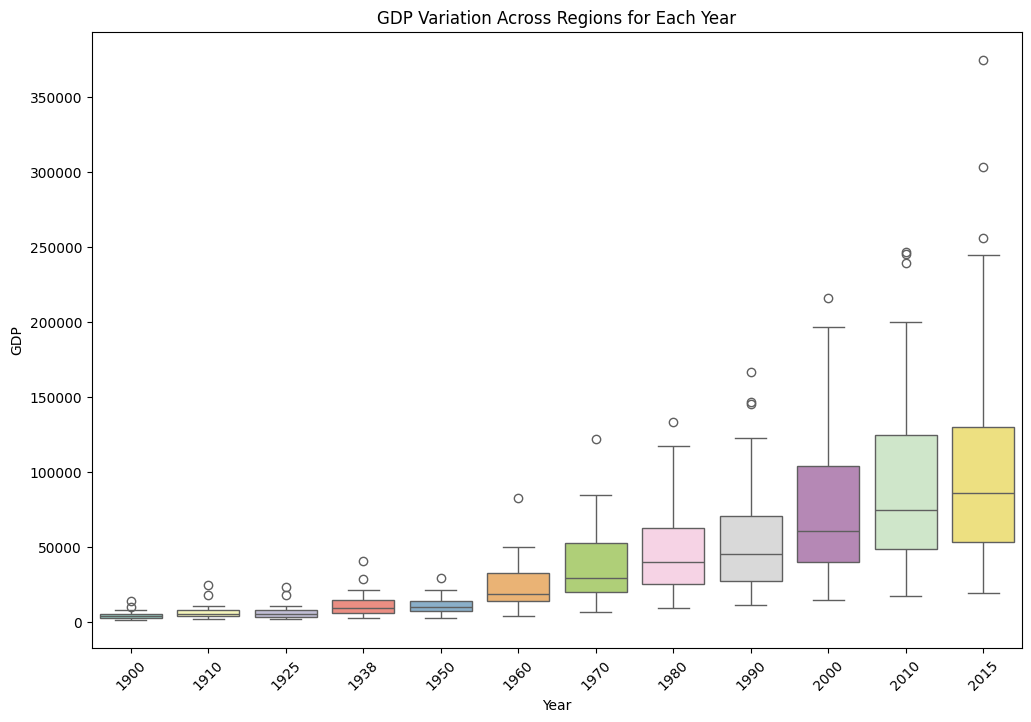

In [101]:
 df_melted =  pd.melt(df_DE, id_vars=['Country', 'Region'], var_name='Year', value_name='GDP')

# Convert 'Year' to string type, handling potential NaNs
df_melted['Year'] = df_melted['Year'].fillna('Missing').astype(str)

# Check for any non-string values in 'Year' (this is a debugging step)
print(df_melted['Year'].unique())

# Generate the box plots
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='GDP', data=df_melted, palette='Set3')

# Rotate x labels for better readability
plt.xticks(rotation=45)

# Add title
plt.title('GDP Variation Across Regions for Each Year')

# Show the plot
plt.show()

In [102]:
DE_Total_GDP.head()

,Country,Region,1900,1910,1925,1938,1950,1960,1970,1980,1990,2000,2010,2015,Total_GDP
49,Germany,"Stuttgart, Regierungsbezirk",4841.607984,7285.838489,6508.118940,11961.803620,16949.114760,45888.22131,72110.74088,94302.89068,122784.95270,166144.47740,200197.02260,244565.67900,993540
50,Germany,"Karlsruhe, Regierungsbezirk",4360.150736,7120.506110,6060.598030,10251.536880,13182.244790,30790.40130,51983.45623,62198.76712,80983.36151,103931.05720,125462.14120,142900.08940,639224
51,Germany,"Freiburg, Regierungsbezirk",3385.175906,4977.100939,3604.496973,7201.249980,8418.358762,17397.25208,29454.90615,41629.78511,51838.12704,71936.78825,87303.07749,99590.02784,426736
52,Germany,"Tbingen, Regierungsbezirk",2587.774870,3741.538975,3018.722616,5570.458454,7241.451745,13844.81865,24079.13279,33672.10594,45056.79638,62395.98464,78753.34611,90883.25481,370845
53,Germany,"Oberbayern, Regierungsbezirk",4748.441117,6447.440109,6158.772743,11216.450880,15163.102570,37152.30147,70198.81570,104458.02790,145001.00970,196903.50570,245701.86280,303408.95380,1146558


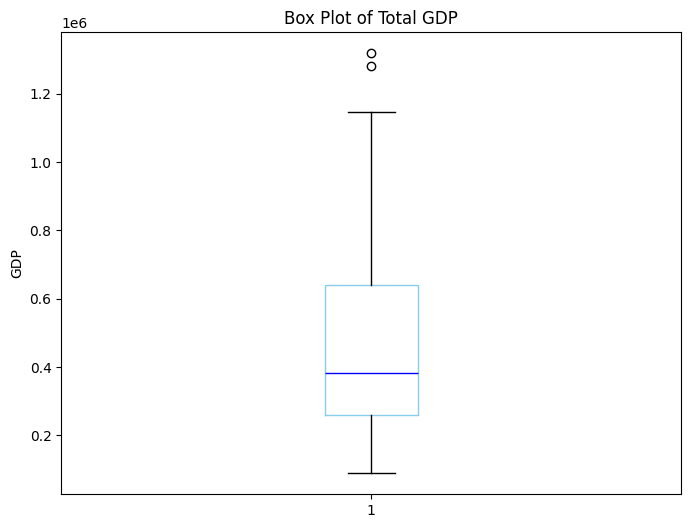

In [107]:
plt.figure(figsize=(8, 6))
plt.boxplot(DE_Total_GDP['Total_GDP'], 
            boxprops=dict(color="skyblue"),
            medianprops=dict(color="blue"))

# Add title and labels
plt.title('Box Plot of Total GDP')
plt.ylabel('GDP')

# Show the plot
plt.show()

#### This box plot shows the distribution of total GDP across German regions. The line inside the box represents the median GDP, while 
#### the box itself captures the middle 50% of the data. Whiskers extend to show the range, with potential outliers displayed beyond them.